# **AirBnB Data Analysis**

**Problem Statement**:
 Since 2008, guests and hosts have used AirBNB to expand on travelling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in San Diego, California for 2019.

.

**Content**

This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

.

**Objectives: Research Questions**

1. *Regarding the Host*
  *   Who are top earners
  *   Is there any relationship between monthly earning and prices

2. *Regarding the Neighbourhood*
  *   Any particular location getting maximum number of bookings
  *   Price relation with respect to location

3. *Regarding the reviews*
  *   Relationship between Quality and Price

4. *Regarding Price*
  *   Price vs amenitites
  *   Price vs location


### **Exploratory Data Analysis**

Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
Importing the data

In [ ]:
airbnb_data = pd.read_csv("https://raw.githubusercontent.com/divyansh-193/airbnb_analysis/main/airbnb_prices.csv")
airbnb_data.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1.0,NaN,156.0,NaN,Red Light/ Canal view apartment (Shared),2017-07-23 13:06:27.391699,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1.0,NaN,126.0,NaN,Sunny and Cozy Living room in quite neighbours,2017-07-23 13:06:23.607187,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1.0,NaN,132.0,NaN,Amsterdam,2017-07-23 13:06:23.603546,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1.0,NaN,121.0,NaN,Canal boat RIDE in Amsterdam,2017-07-23 13:06:22.689787,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1.0,NaN,93.0,NaN,One room for rent in a three room appartment,2017-07-23 13:06:19.681469,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


Finding the unique values of the data

In [ ]:
for column in airbnb_data.columns:
  print(f"Value counts for column '{column}':")
  print(airbnb_data[column].value_counts())
  print("\n")


Value counts for column 'room_id':
room_id
10176931    1
7050078     1
16448872    1
11316029    1
13561991    1
           ..
2012781     1
7430003     1
5879421     1
16103763    1
7605782     1
Name: count, Length: 18723, dtype: int64


Value counts for column 'survey_id':
survey_id
1476    18723
Name: count, dtype: int64


Value counts for column 'host_id':
host_id
48703385     93
113977564    88
1464510      71
107745142    64
84453740     61
             ..
41902443      1
8305721       1
9901234       1
23343555      1
29724632      1
Name: count, Length: 15943, dtype: int64


Value counts for column 'room_type':
room_type
Entire home/apt    14978
Private room        3682
Shared room           63
Name: count, dtype: int64


Value counts for column 'country':
Series([], Name: count, dtype: int64)


Value counts for column 'city':
city
Amsterdam    18723
Name: count, dtype: int64


Value counts for column 'borough':
Series([], Name: count, dtype: int64)


Value counts for column '

Dataframe Informantion

In [ ]:
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

Dataframe summary statistics

In [ ]:
airbnb_data.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude,total_earnings
count,1.872300e+04,18723.0,1.872300e+04,0.0,0.0,18723.000000,18723.000000,18723.000000,18723.000000,0.0,18723.000000,0.0,18723.000000,18723.000000,18723.000000
mean,1.120568e+07,1476.0,3.577612e+07,NaN,NaN,16.741548,3.301127,2.922021,1.430380,NaN,166.599477,NaN,52.365261,4.888585,2480.490573
std,6.082192e+06,0.0,3.758103e+07,NaN,NaN,33.522630,2.213558,1.327524,0.879019,NaN,108.943849,NaN,0.015142,0.034537,4838.254392
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,12.000000,NaN,52.296200,4.763264,0.000000
25%,6.050608e+06,1476.0,7.140879e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,108.000000,NaN,52.355254,4.864344,236.000000
50%,1.228287e+07,1476.0,1.988641e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364628,4.885994,936.000000
75%,1.661084e+07,1476.0,5.202680e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,192.000000,NaN,52.374797,4.907480,2640.000000
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689,107280.000000


In [ ]:
airbnb_data["total_customers"] = airbnb_data["reviews"] * airbnb_data["accommodates"]

### **1. Regarding the Host**

Determining the Top earners

In [ ]:
airbnb_data['total_earnings'] = airbnb_data['price'] * airbnb_data['reviews']

top_earners = airbnb_data.groupby('host_id')['total_earnings'].sum().reset_index()

top_10_earners = top_earners.sort_values(by='total_earnings', ascending=False).head(10)

top_10_earners

,host_id,total_earnings
1292,2674028,162837.0
146,336950,144483.0
646,1464510,121562.0
4651,8558897,118175.0
57,187580,117066.0
1250,2586026,107280.0
415,935723,105712.0
80,225987,101956.0
1047,2234051,100152.0
572,1347048,94064.0


Relationship between earning and prices

In [ ]:
average_price_per_listing = airbnb_data.groupby('host_id')['price'].mean().reset_index()

host_earnings_price = top_earners.merge(average_price_per_listing, on='host_id')

correlation = host_earnings_price['total_earnings'].corr(host_earnings_price['price'])
print("Correlation between average price and total earnings:", correlation)

Correlation between average price and total earnings: 0.124486614901707


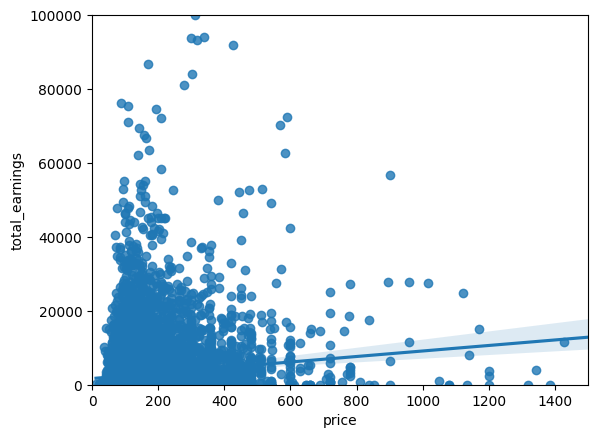

In [ ]:
sns.regplot(x="price", y="total_earnings", data=host_earnings_price)
plt.ylim(0, 100000)
plt.xlim(0, 1500)
plt.show()

### **2. Regarding the Neighborhood**

In [ ]:
neighborhood_reviews = airbnb_data.groupby('neighborhood')['reviews'].count().reset_index()
neighborhood_reviews.rename(columns={"reviews": "no_of_bookings"}, inplace=True)
print(neighborhood_reviews.sort_values( by = 'no_of_bookings', ascending = False))

                              neighborhood  no_of_bookings
7                   De Baarsjes / Oud West            3289
8                  De Pijp / Rivierenbuurt            2378
5                             Centrum West            2225
4                             Centrum Oost            1730
21                              Westerpark            1430
14               Noord-West / Noord-Midden            1418
18                                Oud Oost            1169
2                            Bos en Lommer             988
15  Oostelijk Havengebied / Indische Buurt             921
20                         Watergraafsmeer             517
17                               Oud Noord             494
11                 Ijburg / Eiland Zeeburg             378
19                             Slotervaart             349
3                   Buitenveldert / Zuidas             250
13                              Noord West             241
12                              Noord Oost             2

Determining the top earning neighborhoods

In [ ]:
neighborhood_bookings = airbnb_data.groupby('neighborhood')['reviews'].sum().reset_index()

top_neighborhoods = neighborhood_bookings.sort_values(by='reviews', ascending=False).head(10)
print("Top Neighborhoods by Bookings:\n", top_neighborhoods)

Top Neighborhoods by Bookings:
                               neighborhood  reviews
7                   De Baarsjes / Oud West    52823
5                             Centrum West    52115
4                             Centrum Oost    37221
8                  De Pijp / Rivierenbuurt    35627
21                              Westerpark    23433
14               Noord-West / Noord-Midden    19097
18                                Oud Oost    15615
2                            Bos en Lommer    15481
15  Oostelijk Havengebied / Indische Buurt    13284
17                               Oud Noord     8666


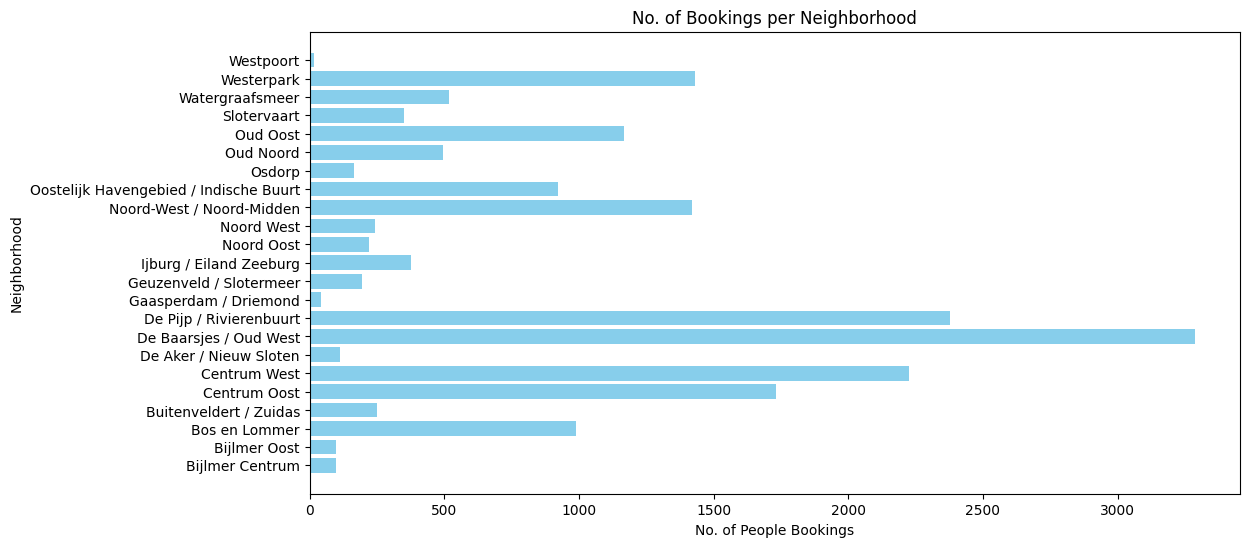

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(neighborhood_reviews['neighborhood'], neighborhood_reviews['no_of_bookings'], color='skyblue')
plt.xlabel('No. of People Bookings')
plt.ylabel('Neighborhood')
plt.title('No. of Bookings per Neighborhood')
plt.show()

Average price per Neighborhood

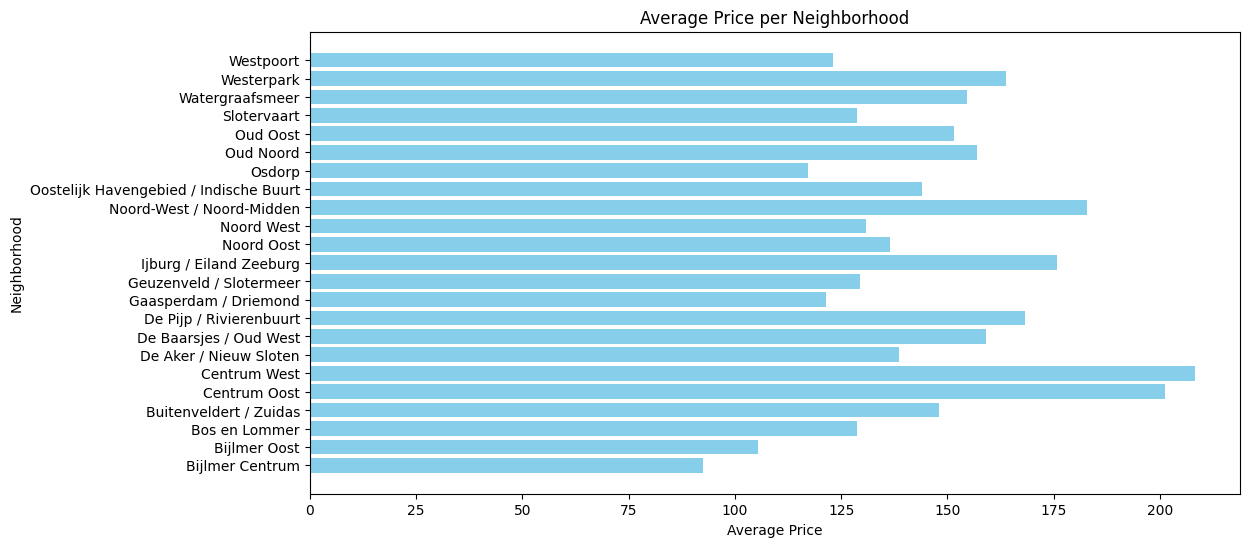

In [ ]:
neighborhood_price = airbnb_data.groupby('neighborhood')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.barh(neighborhood_price['neighborhood'], neighborhood_price['price'], color='skyblue')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.title('Average Price per Neighborhood')
plt.show()

### **3.Regarding the Reviews**

Determining the relationship between quality (which is seen using the overall satisfaction of the customer) and price

In [ ]:
correlation_quality_price = airbnb_data['overall_satisfaction'].corr(airbnb_data['price'])
print("Correlation between quality (overall satisfaction) and price:", correlation_quality_price)

Correlation between quality (overall satisfaction) and price: -0.044774956668632834


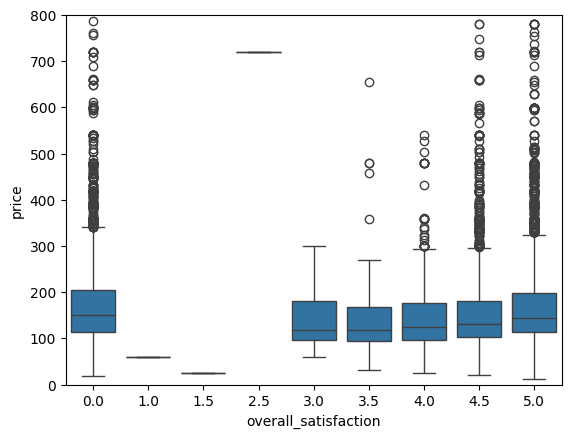

In [ ]:
sns.boxplot(x="overall_satisfaction", y="price", data=airbnb_data)
plt.ylim(0, 800)
plt.show()


### **4. Regarding Price**

Determining the quanities of bedrooms which were listed on AirBnb

In [ ]:
airbnb_data['bedrooms'].value_counts()

bedrooms
1.0     11101
2.0      4456
3.0      1444
0.0      1154
4.0       473
5.0        62
6.0        19
10.0        5
7.0         4
8.0         3
9.0         2
Name: count, dtype: int64

In [ ]:
X = airbnb_data[['bedrooms', 'bathrooms']].fillna(0)  # Fill NaN values with 0
y = airbnb_data['price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     4652.
Date:                Wed, 26 Jun 2024   Prob (F-statistic):               0.00
Time:                        09:43:03   Log-Likelihood:            -1.1231e+05
No. Observations:               18723   AIC:                         2.246e+05
Df Residuals:                   18721   BIC:                         2.246e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.5078      1.361     64.296      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


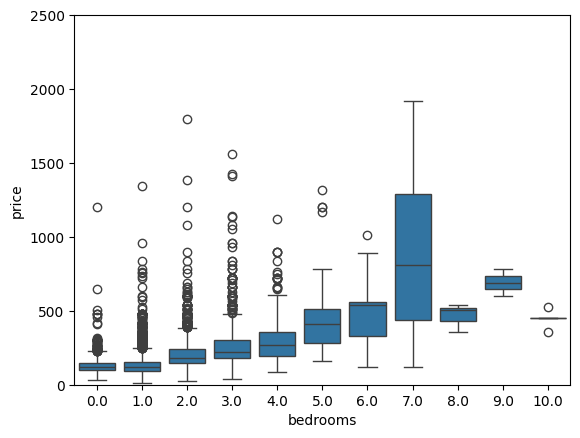

The correlation between number of bedrooms and price is 0.4461436487654141


In [ ]:
sns.boxplot(x="bedrooms", y="price", data=airbnb_data)
plt.ylim(0,2500)
plt.show()

correlation = airbnb_data['bedrooms'].corr(airbnb_data['price'])
print(f"The correlation between number of bedrooms and price is {correlation}")

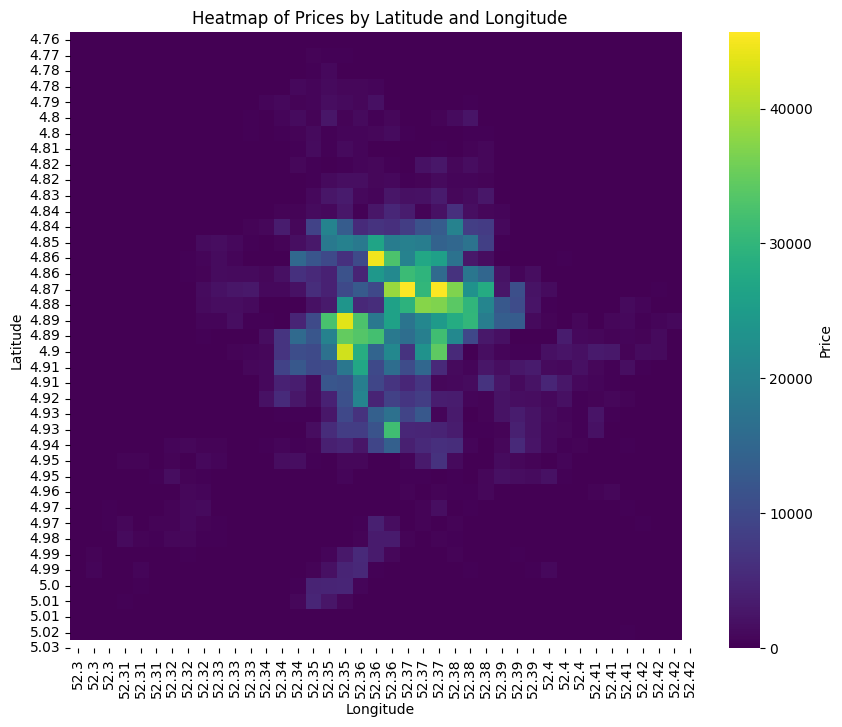

In [ ]:
latitudes = np.linspace(airbnb_data['latitude'].min(), airbnb_data['latitude'].max(), 40)
longitudes = np.linspace(airbnb_data['longitude'].min(), airbnb_data['longitude'].max(), 40)
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes)

heatmap, xedges, yedges = np.histogram2d(airbnb_data['latitude'], airbnb_data['longitude'], bins=[latitudes, longitudes], weights=df['price'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap.T, xticklabels=xedges.round(2), yticklabels=yedges.round(2), cmap='viridis', cbar_kws={'label': 'Price'})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Prices by Latitude and Longitude')
plt.show()

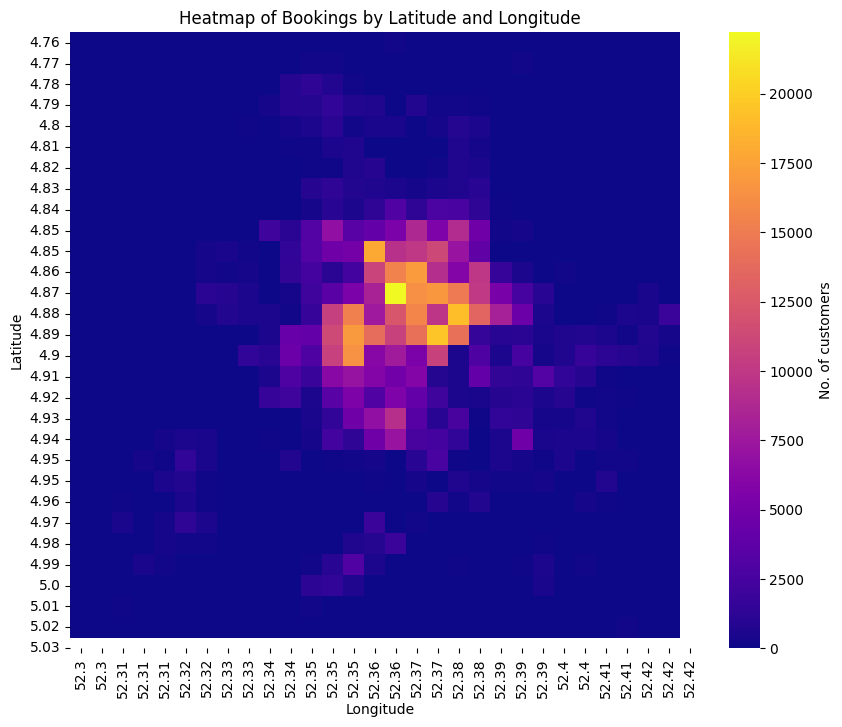

In [ ]:
latitudes = np.linspace(airbnb_data['latitude'].min(), airbnb_data['latitude'].max(), 30)
longitudes = np.linspace(airbnb_data['longitude'].min(), airbnb_data['longitude'].max(), 30)
lat_grid, lon_grid = np.meshgrid(latitudes, longitudes)

heatmap, xedges, yedges = np.histogram2d(airbnb_data['latitude'], airbnb_data['longitude'], bins=[latitudes, longitudes], weights=airbnb_data['total_customers'])

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap.T, xticklabels=xedges.round(2), yticklabels=yedges.round(2), cmap='plasma', cbar_kws={'label': 'No. of customers'})
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Heatmap of Bookings by Latitude and Longitude')
plt.show()